In [17]:
import pandas as pd
import pickle as plk
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data=pd.read_csv("Advertising.csv")

In [5]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
x=data[['TV']]
y=data.sales

In [7]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

In [8]:
print(lm.coef_)
print(lm.intercept_)

[0.04753664]
7.032593549127693


In [9]:
#calculate the prediction
#y=B0+B1x,x=50 dollars
7.032593+0.0475*50

9.407593

In [10]:
X_new=pd.DataFrame({'TV':[50]})
X_new.head()

,TV
0,50


In [11]:
lm.predict(X_new)

array([9.40942557])

In [12]:
data.shape

(200, 5)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [14]:
data.isna().sum()#count of missing values from different columns

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

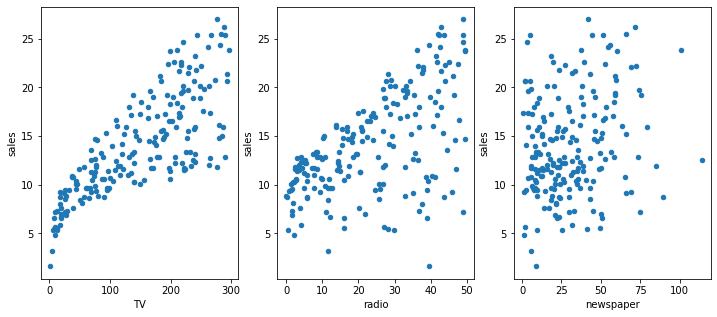

In [15]:
fig,axs=plt.subplots(1,3)
data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(12,5))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])
fig.savefig('testdata.jpg')

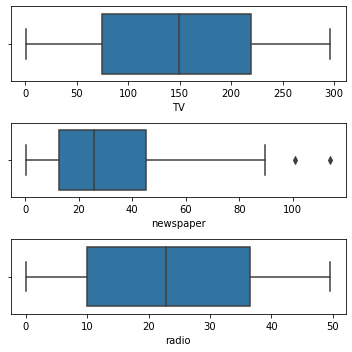

In [20]:
# Finding Outliers
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['radio'], ax = axs[2])
plt.tight_layout()

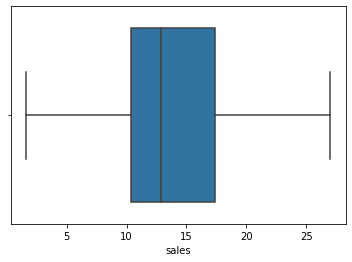

In [21]:
#There are no considerable outliers present in the data
#Sales is the target variable
sns.boxplot(data['sales'])
plt.show()

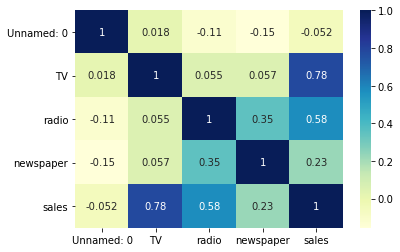

In [19]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [33]:
x_new=pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
x_new.head()

,TV
0,0.7
1,296.4


In [34]:
pred=lm.predict(x_new)
pred

array([ 7.0658692 , 21.12245377])

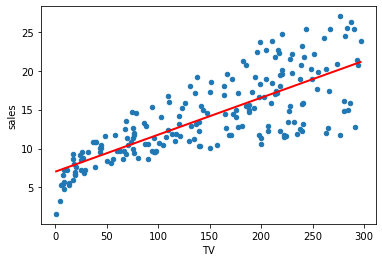

In [35]:
data.plot(kind='scatter',x='TV',y='sales')
plt.plot(x_new,pred,c='r',linewidth=2)

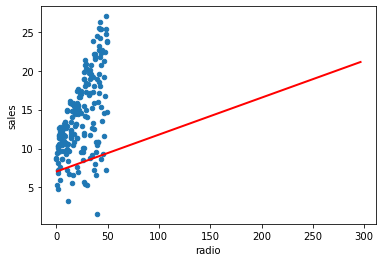

In [36]:
data.plot(kind='scatter',x='radio',y='sales')
plt.plot(x_new,pred,c='r',linewidth=2)

In [37]:
#model confidence
import statsmodels.formula.api as smf
lm=smf.ols(formula='sales~TV',data=data).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [38]:
lm.rsquared
#it is predicted that the model confidence is 61%

0.611875050850071

In [39]:
#multiple linear regression
x=data[['TV','radio','newspaper']]
y=data.sales
lm=LinearRegression()
lm.fit(x,y)
print("intercept",lm.intercept_)
print("TV",lm.coef_[0])
print("radio",lm.coef_[1])
print("newspaper",lm.coef_[2])
#here the newspaper co-effecient is a negative value..resembling that contribution of that attribute is less profitable or loss

intercept 2.9388893694594067
TV 0.04576464545539761
radio 0.18853001691820462
newspaper -0.0010374930424762972


In [40]:
lm=smf.ols(formula='sales~TV+radio+newspaper',data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           1.58e-96
Time:                        15:35:07   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here the pvalue of TV and radio is lessthan 0.05 i.e., it rejects null hypothesis whereas newspaper pvalue is more tha 0.05 we failed to reject null hypothesis

In [41]:
lm=smf.ols(formula='sales~TV+radio',data=data).fit()
lm.conf_int()
lm.summary()
#with or without newspaper, confidence is same

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           4.83e-98
Time:                        15:35:13   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
X = data['TV']
y = data['sales']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [29]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

In [30]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [31]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           2.84e-30
Time:                        23:01:19   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

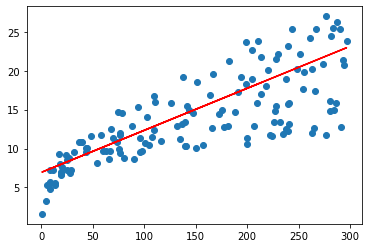

In [32]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

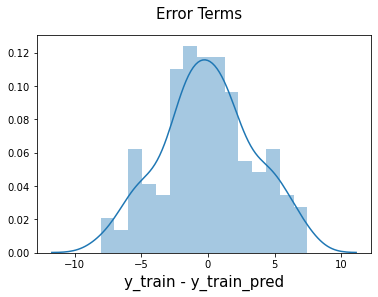

In [33]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                   
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()

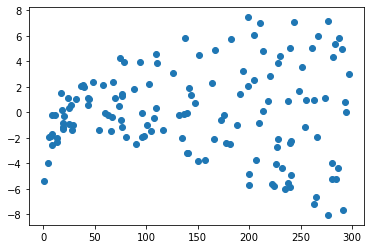

In [34]:
#The residuals are following the normally distributed with a mean 0
plt.scatter(X_train,res)
plt.show()

In [35]:
#regression line is a pretty good fit to the data
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [36]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [38]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.8241456288327007

In [39]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.5942987267783302

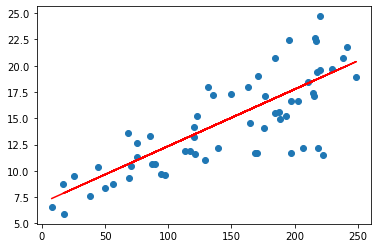

In [40]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

In [44]:
import joblib
joblib.dump(lm,"Advertising-Linear Regression.pkl")

['Advertising-Linear Regression.pkl']